In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import shap

df = pd.read_csv('prep_application_train.csv')
df1 = np.nan_to_num(df)
X = df1[:, 1:13]
y = df1[:, 0]
sc = StandardScaler()
X = sc.fit_transform(X)
X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.2, random_state=0)

In [2]:
#Let's import our xgboost model
Xgboost = pickle.load(open('Xgboost.sav', 'rb'))

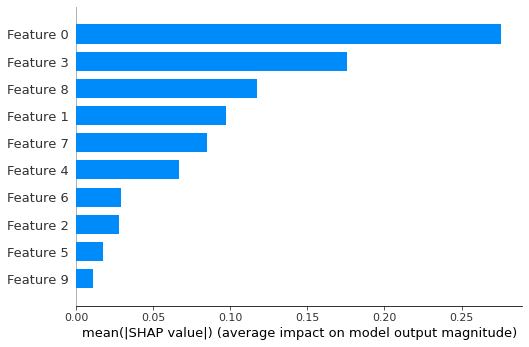

In [3]:
# XAI with SHAP Method

shap_values = shap.TreeExplainer(Xgboost).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

In [4]:
shap_values

array([[ 0.07662712, -0.00513793, -0.02676886, ..., -0.02316365,
         0.07162519, -0.00718339],
       [-0.34747717, -0.50548923, -0.02025679, ...,  0.02911871,
         0.088447  , -0.00766503],
       [-0.09117541, -0.00827016, -0.00961998, ..., -0.00448823,
         0.1260188 , -0.00358319],
       ...,
       [ 0.08877876,  0.20714098,  0.0623149 , ..., -0.07455409,
         0.09227457, -0.0574662 ],
       [ 0.14378883,  0.02134109, -0.01961259, ..., -0.02363995,
         0.09885503, -0.00200997],
       [-0.31956047, -0.51236564, -0.02391518, ...,  0.01175132,
         0.11698311,  0.04776762]], dtype=float32)

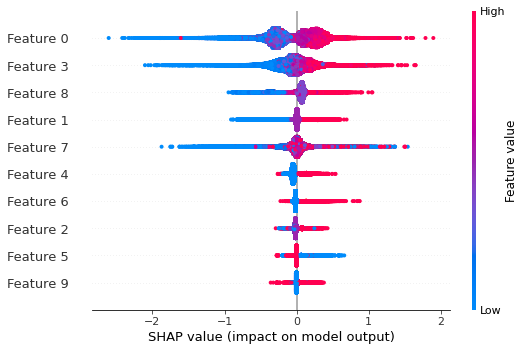

In [5]:
#summary plot 
shap.summary_plot(shap_values, X)

In [6]:
!pip install sphinx 